In [ ]:
Question 1:

 An educational institution has student score data. How can Data Science concepts be used to summarize the data effectively?

Sample Dataset:

    'Student': ['A', 'B', 'C', 'D', 'E'],
    'Score': [85, 90, 78, 92, 88]
Hint:
●	Use basic descriptive statistics (mean, median, mode) to summarize scores.
●	Perform quartile analysis to understand score spread.
●	Calculate variance and standard deviation to measure variability.
●	Visualize data using a box plot and histogram to check distribution.


Basic descriptive statistics (mean, median, mode)
Mean:  86.6 
Median:  88.0
Mode: No mode exists
Quartile analysis
     Score
min   78.0
25%   85.0
50%   88.0
75%   90.0
max   92.0
Variance:  29.8 
Standard deviation:  5.458937625582473


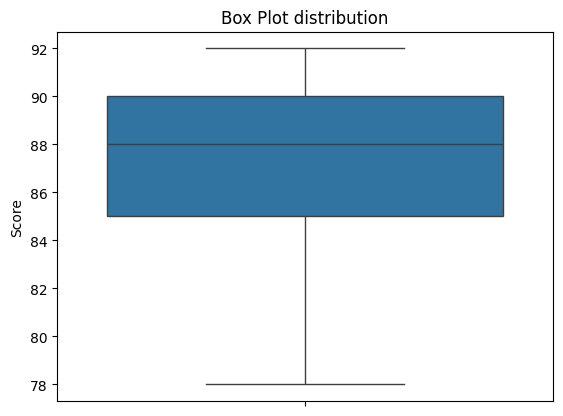

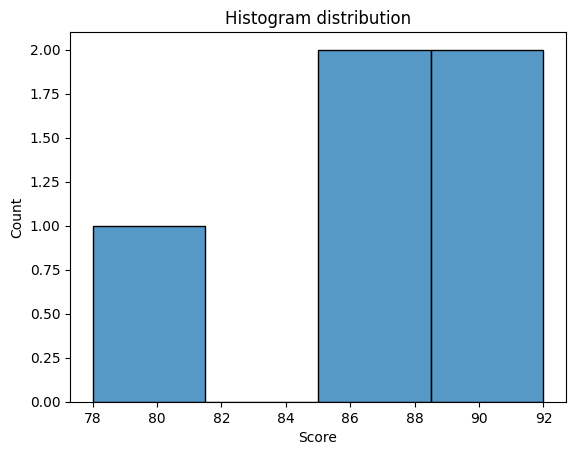

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame({'Student': ['A', 'B', 'C', 'D', 'E'],
    'Score': [85, 90, 78, 92, 88]})

#Use basic descriptive statistics (mean, median, mode) to summarize scores.
print("Basic descriptive statistics (mean, median, mode)")
score_mean=df['Score'].mean()
score_median=df['Score'].median()
score_mode=df['Score'].mode()
print("Mean: ",score_mean,"\nMedian: ",score_median)
if(len(score_mode)==len(df)):
    print("Mode: No mode exists")
else:
    print("Mode: ",score_mode)

#Perform quartile analysis to understand score spread.
print("Quartile analysis")
print(df.describe().loc[['min','25%','50%','75%','max']])

#Calculate variance and standard deviation to measure variability.
var=df['Score'].var()
std=df['Score'].std()
print("Variance: ",var,"\nStandard deviation: ",std)

#Visualize data using a box plot and histogram to check distribution.
sns.boxplot(df['Score'])
plt.title("Box Plot distribution")
plt.show()
sns.histplot(df['Score'])
plt.title("Histogram distribution")
plt.show()

In [ ]:
Question 2: 
An insurance company wants to analyze the distribution of claim amounts. How can Data Science concepts be applied?
Sample Dataset:
    'Claim_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Claim_Amount': [2000, 1500, 3000, 1200, 1800, 2500, 3500, 5000, 2100, 2800]
Hint:
●	Calculate basic descriptive statistics (mean, median, mode).
●	Check the skewness of the claim distribution.
●	Use a box plot to detect outliers and visualize claim amounts.
●	Create a histogram to observe the frequency distribution of claim amounts.


Basic descriptive statistics (mean, median, mode)
Mean:  2540.0 
Median:  2300.0
Mode: No mode exists
Claim distribution is positive(right skewed)


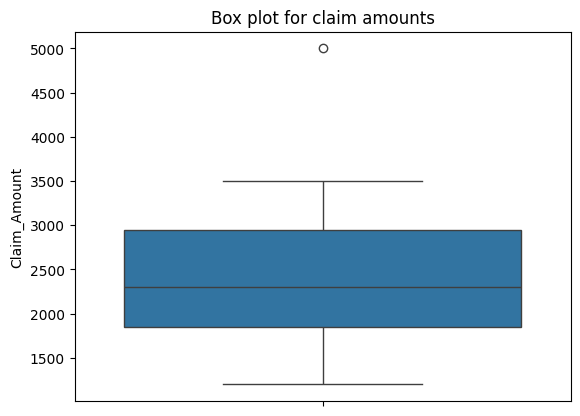

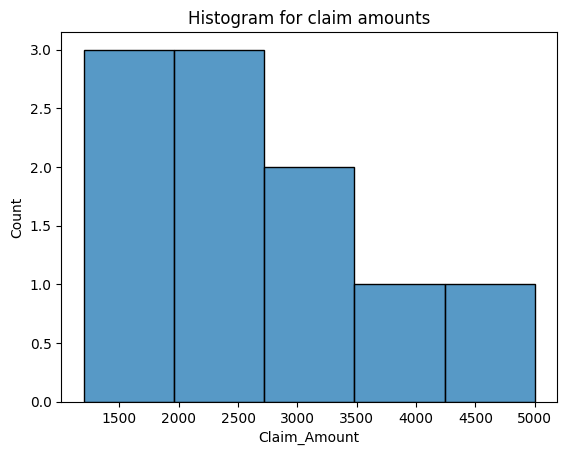

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame({'Claim_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Claim_Amount': [2000, 1500, 3000, 1200, 1800, 2500, 3500, 5000, 2100, 2800]})

#Calculate basic descriptive statistics (mean, median, mode)..
print("Basic descriptive statistics (mean, median, mode)")
amt_mean=df['Claim_Amount'].mean()
amt_median=df['Claim_Amount'].median()
amt_mode=df['Claim_Amount'].mode()
print("Mean: ",amt_mean,"\nMedian: ",amt_median)
if(len(amt_mode)==len(df)):
    print("Mode: No mode exists")
else:
    print("Mode: ",amt_mode)

#Check the skewness of the claim distribution.
if(amt_mean>amt_median):
    print("Claim distribution is positive(right skewed)")
else:
    print("Claim distribution is negative(left skewed)")    
    
#Use a box plot to detect outliers and visualize claim amounts.
sns.boxplot(data=df['Claim_Amount'])
plt.title("Box plot for claim amounts")
plt.show()

#Create a histogram to observe the frequency distribution of claim amounts.
sns.histplot(data=df['Claim_Amount'])
plt.title("Histogram for claim amounts")
plt.show()


In [ ]:
Question 3:
A healthcare organization wants to understand the relationship between patients' age, BMI, and blood pressure levels. How can Data Science concepts be applied?
Sample Dataset:
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'BMI': [22.4, 23.0, 25.5, 26.0, 28.3, 29.1, 30.5, 31.2, 32.1, 33.0],
    'Blood_Pressure': [120, 122, 124, 130, 135, 140, 145, 150, 155, 160]
Hint:
●	Calculate correlation coefficients to check the strength of relationships between age, BMI, and blood pressure.
●	Visualize the relationships using scatter plots.
●	Use a heatmap to represent correlations between the variables.
●	Remove outliers that might affect the analysis.


   Age   BMI  Blood_Pressure
0   25  22.4             120
1   30  23.0             122
2   35  25.5             124
3   40  26.0             130
4   45  28.3             135
5   50  29.1             140
6   55  30.5             145
7   60  31.2             150
8   65  32.1             155
9   70  33.0             160
No outliers detected
Correlation coefficients:
                      Age       BMI  Blood_Pressure
Age             1.000000  0.989785        0.995160
BMI             0.989785  1.000000        0.978476
Blood_Pressure  0.995160  0.978476        1.000000


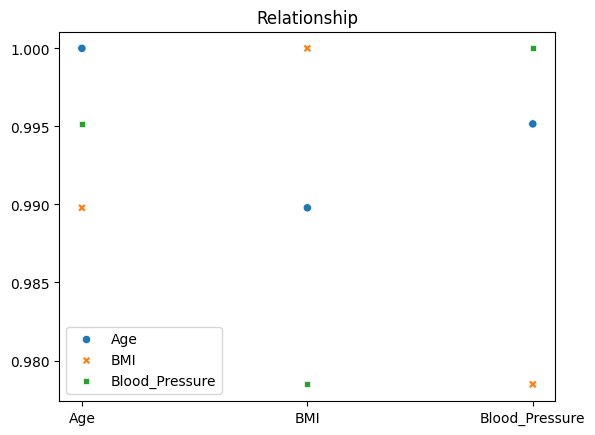

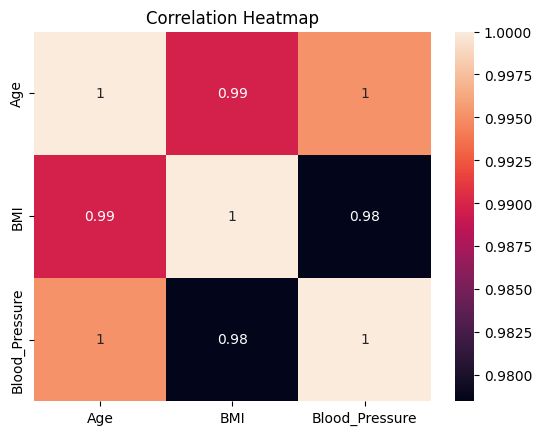

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame({'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'BMI': [22.4, 23.0, 25.5, 26.0, 28.3, 29.1, 30.5, 31.2, 32.1, 33.0],
    'Blood_Pressure': [120, 122, 124, 130, 135, 140, 145, 150, 155, 160]})
print(df)
#Remove outliers that might affect the analysis.
cols=df.columns.tolist()
outliers=[]
for col in cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3=q1
    lb=q1-(1.5*IQR)
    ub=q3+(1.5*IQR)
    for x in df[col]:
        if((x<lb) or (x>ub)):
            outliers=col
            df[col]=df[col].replace(x,df[col].median())
        
if not outliers:
    print("No outliers detected")
else:
    print("Outliers Detected: ",outliers)  
    print("Outliers Replaced\n",df)

#Calculate correlation coefficients to check the strength of relationships between age, BMI, and blood pressure.
corr=df.corr()
print("Correlation coefficients:\n",corr)

#Visualize the relationships using scatter plots.
sns.scatterplot(data=corr)
plt.title("Relationship")
plt.show()

#Use a heatmap to represent correlations between the variables.
sns.heatmap(data=corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
Question 4:

A retail company wants to analyze the sales performance of different products across various regions. How can Data Science concepts be applied?
Sample Dataset:
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'],
    'Product': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Sales': [200, 220, 250, 240, 180, 210, 230, 220]
Hint:
●	Use descriptive statistics (mean, median, mode) to summarize sales data.
●	Analyze the distribution of sales using box plots.
●	Use bar charts to compare sales performance across regions and products.


Descriptive statistics (mean, median, mode)
Mean:  218.75 
Median:  220.0
Mode:  0    220
Name: Sales, dtype: int64


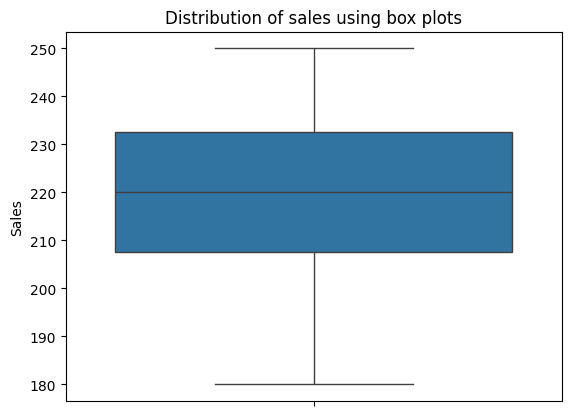

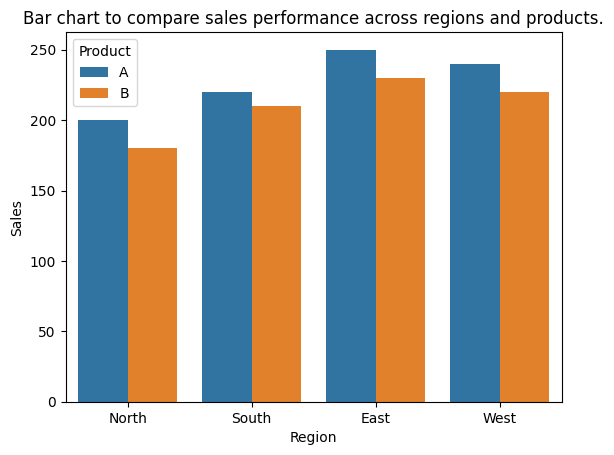

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame({'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'],
    'Product': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Sales': [200, 220, 250, 240, 180, 210, 230, 220]})

#Use descriptive statistics (mean, median, mode) to summarize sales data.
print("Descriptive statistics (mean, median, mode)")
sales_mean=df['Sales'].mean()
sales_median=df['Sales'].median()
sales_mode=df['Sales'].mode()
print("Mean: ",sales_mean,"\nMedian: ",sales_median)
if(len(sales_mode)==len(df)):
    print("Mode: No mode exists")
else:
    print("Mode: ",sales_mode)

#Analyze the distribution of sales using box plots.
sns.boxplot(data=df['Sales'])
plt.title("Distribution of sales using box plots")
plt.show()

#Use bar charts to compare sales performance across regions and products.
sns.barplot(data=df, x='Region', y='Sales', hue='Product')
plt.title("Bar chart to compare sales performance across regions and products.")
plt.show()

In [ ]:
Question 5:
A retail store wants to analyze the distribution of product prices to identify any outliers and understand how the prices are spread.
Hint:
●	Use a histogram to visualize the distribution of product prices.
●	Use a boxplot to identify outliers and understand the price spread.
●	Calculate descriptive statistics (mean, min, max, std) to summarize the data.
Sample Dataset:
    'Product': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 
                'Product F', 'Product G', 'Product H', 'Product I', 'Product J'],
    'Price': [450, 510, 490, 430, 550, 1200, 480, 495, 475, 520]


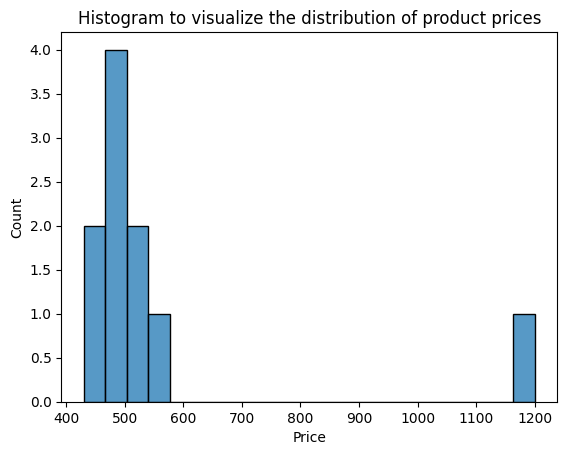

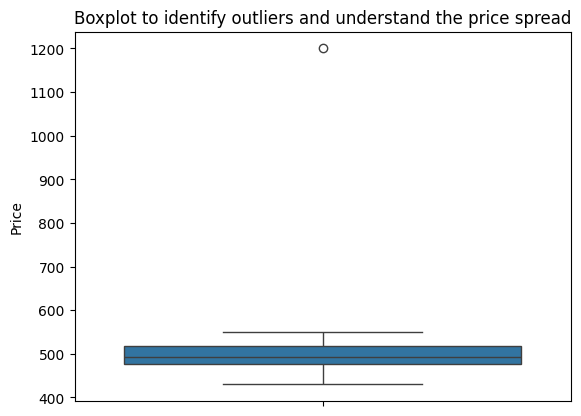

Descriptive statistics (mean, median, mode)
Mean:  560.0 
Median:  492.5
Mode: No mode exists


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.DataFrame({'Product': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E', 
                'Product F', 'Product G', 'Product H', 'Product I', 'Product J'],
    'Price': [450, 510, 490, 430, 550, 1200, 480, 495, 475, 520]})

#Use a histogram to visualize the distribution of product prices.
sns.histplot(data=df['Price'])
plt.title("Histogram to visualize the distribution of product prices")
plt.show()

#Use a boxplot to identify outliers and understand the price spread.
sns.boxplot(data=df['Price'])
plt.title("Boxplot to identify outliers and understand the price spread")
plt.show()

#Calculate descriptive statistics (mean, min, max, std) to summarize the data.
print("Descriptive statistics (mean, median, mode)")
price_mean=df['Price'].mean()
price_median=df['Price'].median()
price_mode=df['Price'].mode()
print("Mean: ",price_mean,"\nMedian: ",price_median)
if(len(price_mode)==len(df)):
    print("Mode: No mode exists")
else:
    print("Mode: ",price_mode)